# Demo labeltext
Segmenting letters, words and paragraphs.

## Description
In this example, a digitized text is processed to identify the letters, words and paragraphs. This demonstration uses only the ialabel function with different connectivity parameters.

In [1]:
import numpy as np
from PIL import Image
import ia870 as mm

### Reading
The text image is read.

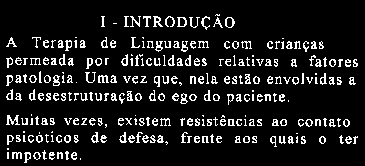

In [2]:
f_pil = Image.open('data/stext.tif')
f_pil

## First, label the letters.
The letters are the main connected components in the image. So we use the classical 8-connectivity criteria for identify each letter.

Number of labels: 262


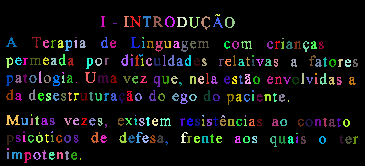

In [3]:
f = np.array(f_pil)
fl = mm.ialabel(f, mm.iasebox())
g = mm.iaglblshow(fl)
print('Number of labels:',fl.max())
Image.fromarray(g.transpose(1,2,0))

## Second, label the words.
The words are made of closed letters. In this case we use a connectivity specified by a rectangle structuring element of 7 pixels high and 11 pixels width, so any two pixels that can be hit by this rectangle, belong to the same connected component. The values 7 and 11 were chosen experimentally and 
depend on the font size.

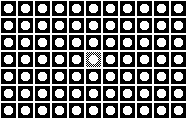

In [6]:
sew = np.ones((7,11),bool)
Image.fromarray(mm.iaseshow(sew,'EXPAND').astype(np.uint8) * 255)

Number of labels: 44


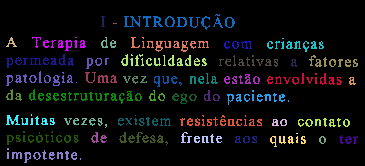

In [7]:
fw = mm.ialabel(f,sew)
print('Number of labels:',fw.max())
Image.fromarray(mm.iaglblshow(fw).transpose(1,2,0))

## Finally, label the paragraphs.
Similarly, paragraphs are closed words. In this case the connectivity is given by a rectangle of 35 by 20 pixels.



Number of labels: 3


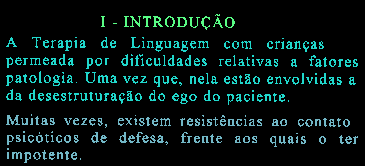

In [8]:
sep = np.ones((20,35),bool)
fp = mm.ialabel(f,sep)
print('Number of labels:',fp.max())
Image.fromarray(mm.iaglblshow(fp).transpose(1,2,0))